#참고

https://junsik-hwang.tistory.com/38

In [1]:
#data load

import pandas as pd
import numpy as np


data = pd.read_csv('/content/drive/MyDrive/adpdata/cats.csv')

data

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


#고양이의 몸무게와 길이는 서로 관련이 있는가?

In [17]:
bwt = data['Bwt']

hwt = data['Hwt']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


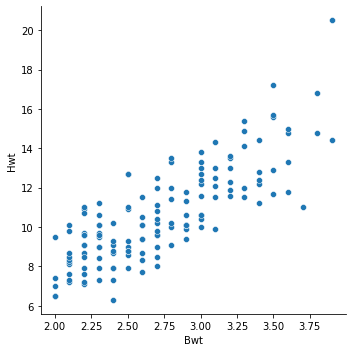

In [19]:
import seaborn as sns

sns.relplot(bwt,hwt)

1. 정규성 검정

피어슨 상관계수에 대한 검정이 데이터가 normal 분포를 따른다고 가정하므로 정규성 검정을 먼저 수행한다

scipy.stats.shapiro(x)를 이용해 수행

In [20]:
from scipy.stats import shapiro


shapiro(bwt)

(0.9518786668777466, 6.730248423991725e-05)

In [21]:
shapiro(hwt)

(0.9603861570358276, 0.0003653781022876501)

bwt,hwt 모두 귀무가설을 기각하므로 정규분포를 따른다고 보기 어렵다

따라서 spearman 상관계수나 kendall의 tau를 이용하여 상관계수 검정을 수행

2. 상관계수에 대한 검정

H0: 상관계수 = 0

H1: 상관계수가 0이 아니다

scipy.stats.spearmanr(x,y)

scipy.stats.kendalltau(x,y)

In [22]:
from scipy.stats import pearsonr, spearmanr, kendalltau

spearmanr(bwt,hwt)

SpearmanrResult(correlation=0.7908427439891929, pvalue=4.423953331693368e-32)

In [23]:
kendalltau(bwt,hwt)

KendalltauResult(correlation=0.6079402924750057, pvalue=1.2505655477422967e-25)

2가지 경우 모두 p-value가 충분히 작아 귀무가설을 기각한다

따라서 고양이의 몸무게와 길이는 강한 양의 상관관계가 있다는 것을 확인할 수 있다

In [24]:
pearsonr(bwt,hwt) #피어슨 상관계수

(0.8041274235087924, 6.9690446128599455e-34)